In [10]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
import emnist
from pathlib import Path
from pytesseract import image_to_string

# Creating model

In [3]:
model = keras.models.load_model('../models/model_char_degit.h5')

2022-11-29 12:25:34.046193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ivan/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-29 12:25:34.046230: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-29 12:25:34.046257: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ivan-Lenovo): /proc/driver/nvidia/version does not exist
2022-11-29 12:25:34.046535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Preprocessing data

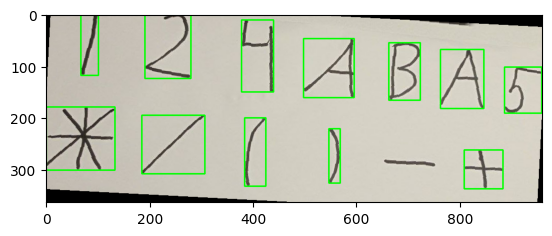

In [23]:
image_pil = Image.open('../../data/test/test_image_8.jpg')

image_pil = image_pil.rotate(-3)

image = np.array(image_pil)
# image = cv2.imread('../../data/test/test_image_8.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

# обрезка шума               изображение, порог, светлые, темные
ret, thresh = cv2.threshold(grey.copy(), 160, 255, cv2.THRESH_BINARY_INV)
# поиск контуров
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []

#разворачиваем массив
contours = contours[::-1]

for c in contours:
    x,y,w,h = cv2.boundingRect(c)

    # пропуск шумов
    if (w < 10 or h < 50):
        continue

    # Создание прямоугольника вокруг цифры на исходном изображении (для отображения цифр, выбранных с помощью контуров)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Вырезание цифры из изображения, соответствующей текущим контурам в цикле for
    digit = thresh[y:y+h, x:x+w]

    # Изменение размера этой цифры на (18, 18)
    resized_digit = cv2.resize(digit, (18,18))

    # Дополняем цифру 5 пикселями черного цвета (нулями) с каждой стороны, чтобы в конечном итоге получить изображение (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

    # Добавление предварительно обработанной цифры в список предварительно обработанных цифр
    preprocessed_digits.append(padded_digit)
    # print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)

=========PREDICTION============ 


1/1 [==============================] - 0s 17ms/step


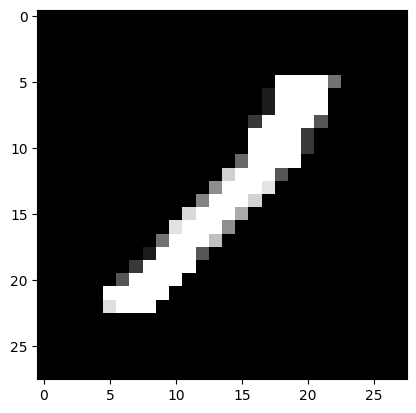


Final Output: 
1

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 17ms/step


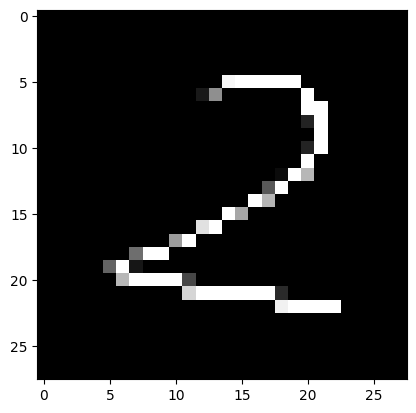


Final Output: 
2

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 23ms/step


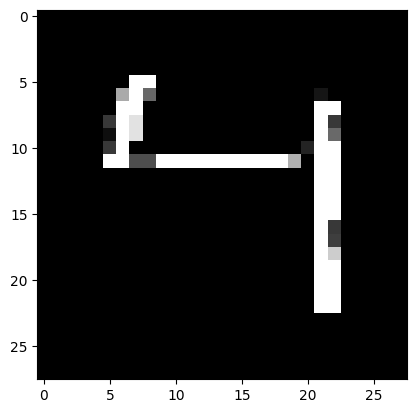


Final Output: 
4

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 21ms/step


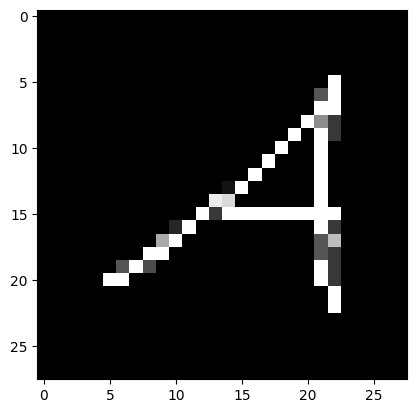


Final Output: 
A

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 23ms/step


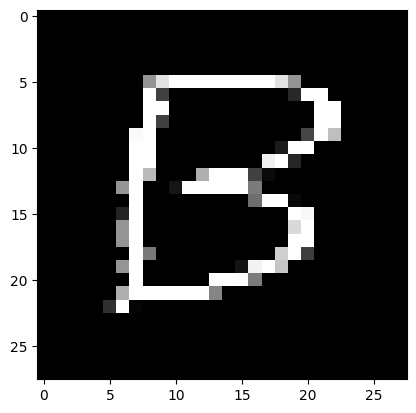


Final Output: 
B

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 22ms/step


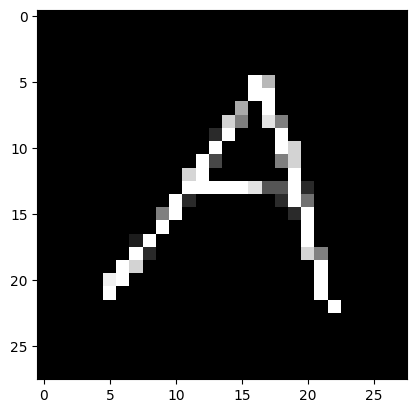


Final Output: 
A

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 21ms/step


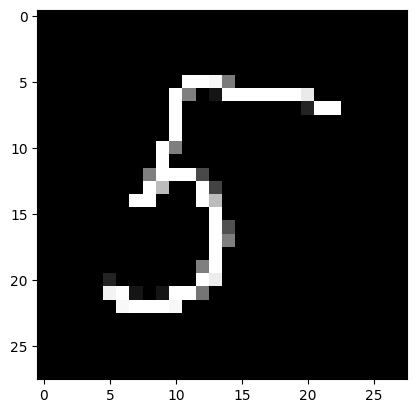


Final Output: 
5

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 20ms/step


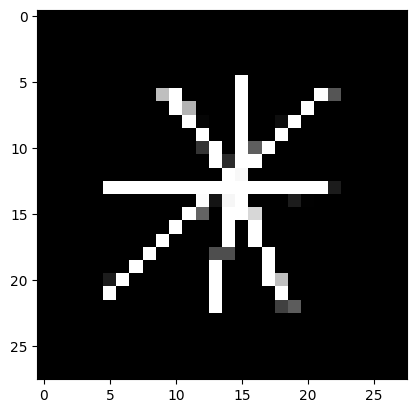


Final Output: 
*

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 25ms/step


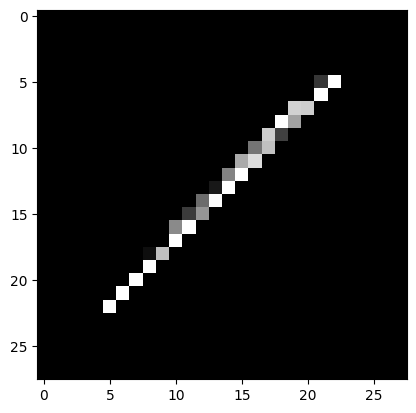


Final Output: 
/

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 19ms/step


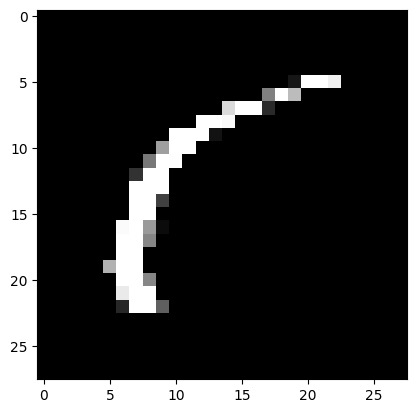


Final Output: 
C

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 18ms/step


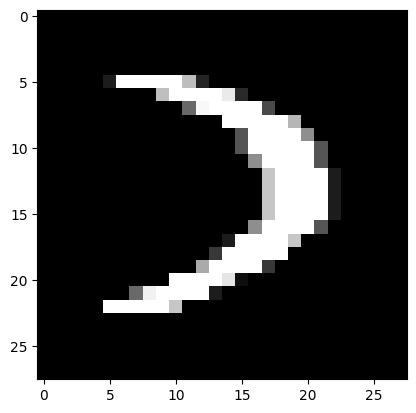


Final Output: 
D

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 18ms/step


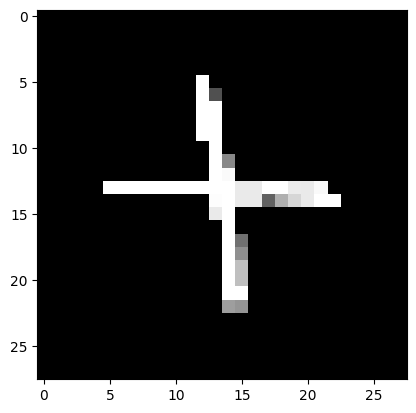


Final Output: 
+

---------------------------------------



In [24]:
diction = {'0':'0','1':'1','2':'2','3':'3','4':'4','5':'5','6':'6','7':'7','8':'8','9':'9', \
           '10':'A', '11':'B', '12':'C', '13':'D', '14':'E', '15':'F', '16':'J', '17':'H', \
            '33':'*', '34':'/', '46':'+'}

for digit in preprocessed_digits:
    print ("=========PREDICTION============ \n\n")
    prediction = model.predict(digit.reshape(1, 28, 28, 1))

#   вывод картинки
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
#   вывод результата
#     print("\nFinal Output: {}".diction(format(np.argmax(prediction))))
    print("\nFinal Output: ")
    print(diction[format(np.argmax(prediction))])
    # hard_maxed_prediction = np.zeros(prediction.shape)
    # hard_maxed_prediction[0][np.argmax(prediction)] = 1
    # print ("\nHard-maxed form of the prediction: \n {}".format(hard_maxed_prediction))

  # вывод вектора
  #   print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
  #   hard_maxed_prediction = np.zeros(prediction.shape)
  #   hard_maxed_prediction[0][np.argmax(prediction)] = 1
  #   print ("\nHard-maxed form of the prediction: \n {}".format(hard_maxed_prediction))
    print ("\n---------------------------------------\n")